# KNN Machine Learning Model Kullanarak Şeker Hastalığını Tahmin Etme

**K-Nearest Neighbours:**
- Daha önce elde edilen noktalara bakarak yeni bir nokta geldiği zaman onun hangi grupta olduğunu bulmak için kullanılır.
- En yakındaki K tane komşu nokta bulunur.
- En çok hangi gruptan komşu nokta varsa yeni gelen noktanın o gruptan olduğu kabul edilir.

<img src= https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png>


Kaynak: https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

# Outcome 1 --> Diyabet
# Outcome 0 --> Sağlıklı

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


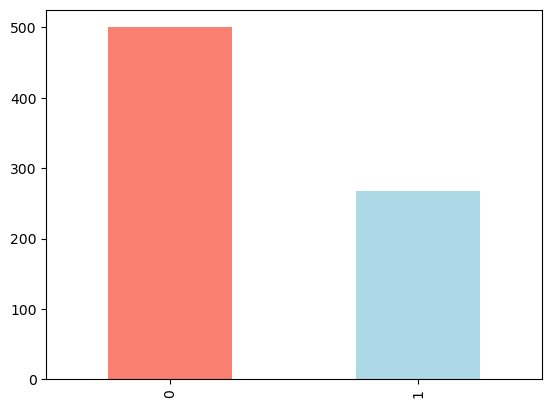

In [4]:
data["Outcome"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

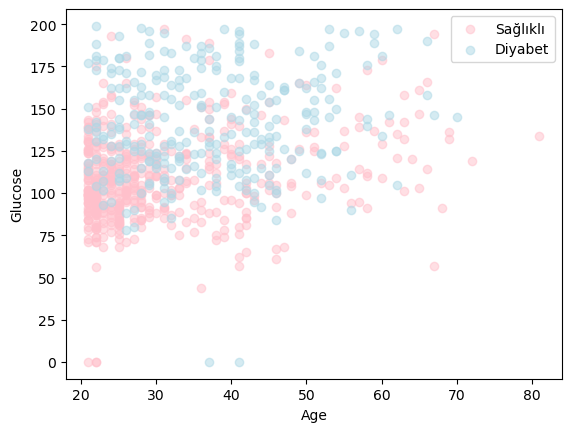

In [5]:
seker_hastalari = data[data.Outcome == 1]
saglikli = data[data.Outcome == 0]

plt.scatter(saglikli.Age, saglikli.Glucose, color="pink", label="Sağlıklı", alpha=0.5);
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="lightblue", label="Diyabet", alpha=0.5);
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [6]:
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"], axis=1)

# Normalleştirme
x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri)-np.min(x_ham_veri))

print("Normalleştirme öncesi ham veriler:\n")
print(x_ham_veri.head())

print("\n\n Normalleştirme sonrası yapay zekaya eğitim için vereceğimiz veriler: \n")
print(x.head())

Normalleştirme öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


 Normalleştirme sonrası yapay zekaya eğitim için vereceğimiz veriler: 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.47058

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)

# Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("K=3 için Test verilerimizin doğrulama testi sonucu: ", knn.score(X_test, y_test))

# En iyi k değeri için
sayac = 1
for k in range(1, 11):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(X_train, y_train)
    print(sayac, " ", "Doğruluk Oranı: %", knn_yeni.score(X_test, y_test)*100)
    sayac +=1
    

K=3 için Test verilerimizin doğrulama testi sonucu:  0.7857142857142857
1   Doğruluk Oranı: % 69.48051948051948
2   Doğruluk Oranı: % 74.02597402597402
3   Doğruluk Oranı: % 78.57142857142857
4   Doğruluk Oranı: % 75.97402597402598
5   Doğruluk Oranı: % 79.87012987012987
6   Doğruluk Oranı: % 79.22077922077922
7   Doğruluk Oranı: % 81.16883116883116
8   Doğruluk Oranı: % 79.22077922077922
9   Doğruluk Oranı: % 78.57142857142857
10   Doğruluk Oranı: % 79.22077922077922


In [8]:
# Yeni gelen hastanın tahlil sonuçlarına göre tahmin etmek:

# Normalleştirme için MinMaxScaler kullanacağız.
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

new_prediction = knn.predict(sc.transform(np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])))
new_prediction[0]

1